# MLSTRUCT-FP

In [1]:
from pathlib import Path
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

from utils.utils import load_yaml_config

cfg = load_yaml_config()
datasets_cfg = cfg["file_paths"]["datasets"]
DATASETS_DIR = datasets_cfg["root"]
datasets = Path(DATASETS_DIR)

mls_struct_fp = datasets / datasets_cfg["relative_paths"]["mls_struct_fp"]

assert mls_struct_fp.is_dir, f"Invalid directory: {mls_struct_fp}"
mls_struct_fp

PosixPath('/home/yunusskeete/Documents/data/2D/Floor Plans/MLSTRUCT-FP/MLSTRUCT-FP_v1')

In [2]:
import json

json_data = [f for f in mls_struct_fp.iterdir() if f.suffix == ".json"].pop()

with open(json_data, "r") as f:
    data = json.load(f)

data.keys()

dict_keys(['rect', 'slab', 'floor'])

In [3]:
rects = data["rect"]

len(rects), list(rects.keys())[:5]

(70873, ['1000393', '1000563', '1000960', '1001016', '1001033'])

In [4]:
rect_generator = (item for item in rects.items())

{'angle': 0.0, 'floorID': 8660851, 'length': 6.2, 'line': [0.0, -25.232, 0.0], 'thickness': 0.2, 'wallID': 7366884, 'x': [4.918, 11.118, 11.118, 4.918], 'y': [-25.132, -25.132, -25.332, -25.332]}


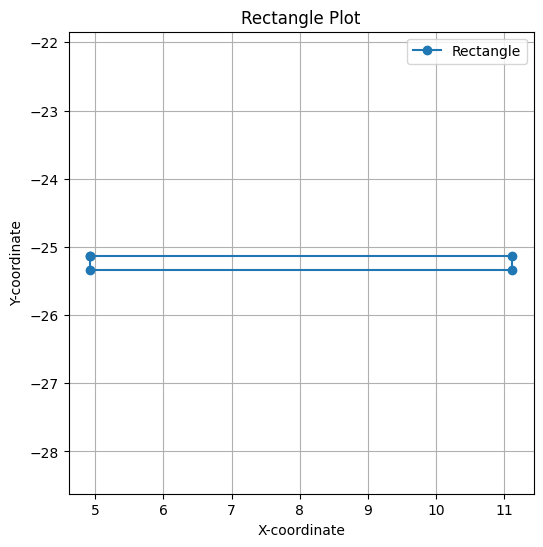

In [16]:
import matplotlib.pyplot as plt

uid, rect = next(rect_generator)
print(rect)
floor_id = str(rect["floorID"])

# Ectract coordinates
x = rect["x"]
y = rect["y"]

CLOSE_LOOP = True

if CLOSE_LOOP:
    # Ensure the coordinates form a closed loop
    x.append(x[0])
    y.append(y[0])

# Create plot
plt.figure(figsize=(6, 6))
plt.plot(x, y, "-o", label="Rectangle")  # Using '-o' to plot lines with points
plt.title("Rectangle Plot")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.grid(True)
plt.axis("equal")  # Ensures square aspect ratio
plt.legend()
plt.show()

In [17]:
floor_id

'8660851'

In [18]:
floors = data["floor"]
len(floors), list(floors.keys())[:5]

(954, ['1014539', '1026173', '1027961', '1049408', '1058861'])

In [20]:
floors[floor_id]

{'image': 'ecc1731f01e73200cd4bf55015ce40d603238311.png', 'scale': 143.767}

In [23]:
from PIL import Image

image_path = mls_struct_fp / floors[floor_id]["image"]
Image.open(image_path)